# Questions taken from Stackoverflow

This page lists questions about automata and other rational/regular expressions that were asked on Stackoverflow, and where [Vcsn](http://vcsn.lrde.epita.fr) seems to be an appropriate tool to compute the answer.

## [Build a Regular Expression and Finite Automata](http://stackoverflow.com/questions/22366534)

> The set of all strings beginning with 101 and ending with 01010. 

First, let's define our "context": we work with "labels are letters" (lal), on the alphabet $\{0, 1\}$.  We don't use weights, or rather, we use the traditional Boolean weights: $\mathbb{B}$.

In [1]:
import vcsn
c = vcsn.context('lal_char(01), b')
c

{01} -> B

Then, we build our expression using an unusual operator: $\mathsf{E} \& \mathsf{F}$ denotes the conjunction of expressions $\mathsf{E}$ and $\mathsf{F}$.  In this case (unweighted/Boolean automata), it denotes exactly the intersection of languages.

In [2]:
e = c.expression('(101[01]*)&([01]*01010)')
e

101(0+1)*&(0+1)*01010

We want to normalize this extended expression (it has conjunction and complement operators) into a basic expression.  To this end, we first convert it to an automaton.

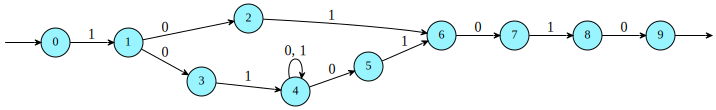

In [3]:
a = e.automaton()
a

and then we convert this automaton into a basic expression:

In [4]:
a.expression()

1(01+01(0+1)*01)010

Or, in ASCII:

In [5]:
print(a.expression())

1(01+01(0+1)*01)010


## [Regular expression to match text that *doesn't* contain a word?](http://stackoverflow.com/questions/406230)
 > I'd like to know if it's possible to match lines that don't contain a specific word (e.g. hede) using a regular expression?

First, let's define that alphabet we work on: from $a$ to $z$ for instance.

In [6]:
import vcsn
c = vcsn.context('lal_char(a-z), b')
c

{abcdefghijklmnopqrstuvwxyz} -> B

Then we define our expression, which is extended (it uses the complement operator), so to normalize it, we first convert it into automaton (with `_expression_.automaton`), from which we extract a basic expression (with `_automaton_.expresion`).

In [7]:
e = c.expression('(hede){c}')
e

(hede){c}

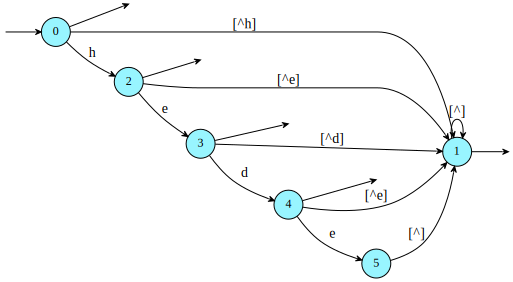

In [8]:
a = e.automaton()
a

In [9]:
a.expression()

\e+h(\e+e(\e+d))+([^h]+h([^e]+e([^d]+d([^e]+e[^]))))[^]*

Or, in ASCII (`+` is usually denoted `|`; `\e` denotes the empty word; and `[^]` denotes any character, usually written `.`):

In [10]:
print(a.expression())

\e+h(\e+e(\e+d))+([^h]+h([^e]+e([^d]+d([^e]+e[^]))))[^]*
